Use el método de Adams-Moulton de tres pasos descrito en clase para resolver el siguiente problema de valor inicial:

$$
y'(t) = te^{3t} - 2y\,,\quad 0 \leq t \leq 1\,, \quad y(0) = 0\,.
$$

Recuerde que este método usa $w_{i+1}$ para calcular $w_{i+1}$ tal que es necesario resolver algebráicamente la ecuación resultante y así obtener una expresión explícita para $w_{i + 1}$ que se pueda usar en el código.

In [23]:


import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

#Definimos la función 
def f(t,y):
    return t*np.exp(3*t) - 2*y


#Usamos la ecuacion definida de Adams-Moulton vista en clase

def apc4(f, a, b, yo, N):
    
    h = (b-a)/N
    i = 0
    w = yo
    t = a
    
    ws = np.zeros(N+1)
    ts = np.zeros(N+1)
    fi = 0
    fim1 = 0
    fim2 = 0
    fim3 = 0
    
    for i in range(N):
        ts[i] = t
        ws[i] = w
        fim3 = fim2
        fim2 = fim1
        fim1 = fi
        fi = f(t,w)
        if i < 3:
            w += rk4_step(f, fi, t, w, h)
        else:
            # Predictor Adams-Bashforth de 4 pasos
            #w = ws[i] + h*(55*fi - 59*fim1 +37*fim2 - 9*fim3)/24
            # Corrector Adams-Moulton de 3 pasos
            w = ws[i] + h*(9*f(t + h, w) + 19*fi - 5*fim1 + fim2)/24
        t += h
        
    ws[N] = w
    ts[N] = t
    
    return ts, ws


a = 0
b = 2
yo = 0.5

def exacta(t):
    return (t + 1)**2 - 0.5*np.exp(t)

En esta función f es la ecuación diferencial, a es 0, b es 1, y0 es 0, y N la cantidad de intervalos dentro de [a,b]. No usaremos el predictor de Adams-Bashfort solo porque no se pidió el predictor en este caso.
Luego se grafica:

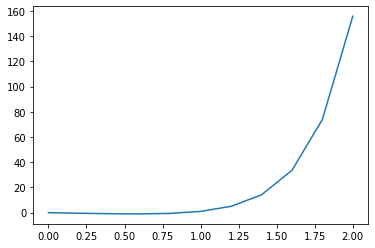

In [24]:
sol_apc = apc4(f, a, b, yo, 10)
plt.plot(sol_apc[0], sol_apc[1] - exacta(sol_apc[0]), label='APC4')